In [8]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import random
import json
import os
import re
import seaborn as sns
import math

In [9]:
def read_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='5_5.pcap/', type='variation.txt'):
    res = {}
    res[algo] = []
    for epoch in epochs:
        
        path = f"../SketchPatternQuery/{algo}/{dataset}"\
                f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
        
        for dir in sorted(os.listdir(path)):
            p = os.path.join(path, dir)
            if os.path.isdir(p): 
                full_path = os.path.join(path, dir, type)    
                with open(full_path, 'r') as f:
                    for line in f:
                        num_str = re.match(r'\(srcIP = +(\d+\.\d+\.\d+\.\d+)\) +(.+)', line).group(2)
                        num_list = [int(num) for num in num_str.split()]
                        # print(num_list)
                        res[algo].append(num_list)
            
    return res

read_data()

{'cm': [[9, 11, 5, 4, 16, 16, 7, 7, 6, 7, 1, 1, 1, 3, 0, 1, 6, 4, 4],
  [14, 12, 8, 16, 2, 17, 11, 15, 14, 31, 4, 5, 1, 6, 4, 5, 1, 3, 3],
  [3, 13, 16, 16, 21, 7, 7, 16, 16, 10, 3, 4, 1, 1, 1, 0, 1, 1, 1],
  [7, 15, 13, 9, 3, 4, 4, 0, 3, 9, 12, 6, 7, 2, 4, 2, 4, 6, 8],
  [8, 20, 8, 8, 11, 7, 16, 13, 15, 15, 1, 3, 2, 0, 0, 1, 1, 2, 0],
  [27, 21, 101, 88, 21, 26, 30, 34, 22, 10, 8, 11, 53, 3, 0, 0, 3, 2, 4],
  [9, 15, 18, 4, 15, 11, 16, 22, 19, 14, 3, 28, 8, 9, 3, 3, 0, 2, 6],
  [41, 86, 44, 24, 31, 40, 37, 36, 60, 37, 1, 3, 6, 3, 3, 1, 0, 2, 1],
  [7, 5, 13, 9, 12, 8, 6, 8, 2, 11, 7, 2, 1, 1, 0, 0, 2, 0, 1],
  [36, 60, 144, 65, 76, 84, 80, 48, 67, 69, 4, 3, 0, 3, 0, 0, 2, 0, 6],
  [35, 23, 24, 17, 27, 19, 28, 21, 20, 12, 0, 3, 3, 1, 0, 3, 2, 1, 2],
  [23, 39, 14, 15, 21, 16, 22, 14, 25, 9, 5, 3, 1, 2, 1, 1, 4, 4, 7],
  [14, 12, 5, 20, 5, 7, 10, 11, 6, 5, 1, 2, 1, 2, 0, 0, 1, 1, 1],
  [22, 20, 3, 1, 4, 10, 11, 6, 7, 5, 0, 0, 6, 2, 2, 1, 0, 1, 2]]}

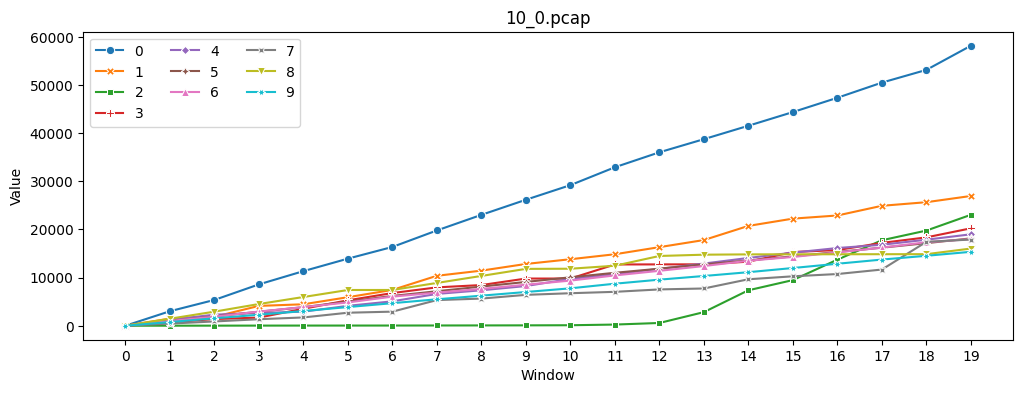

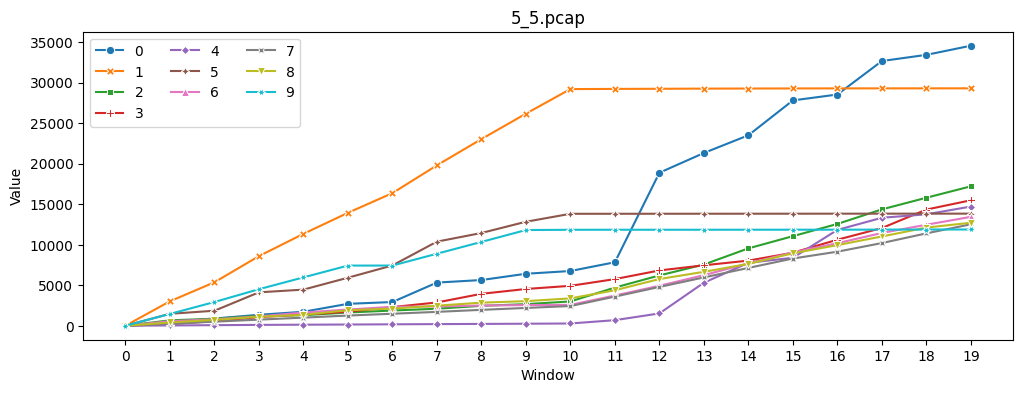

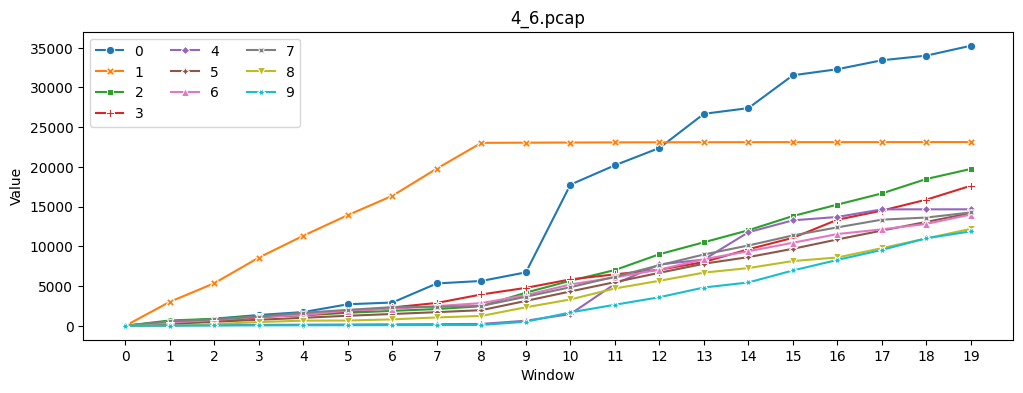

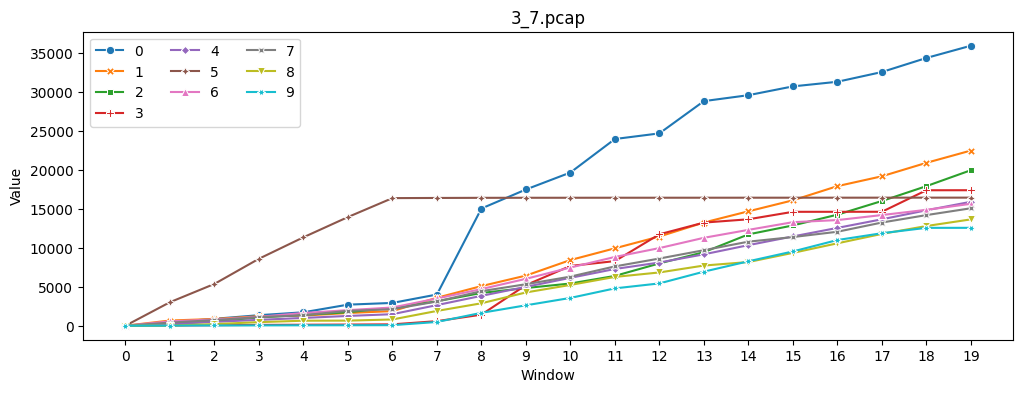

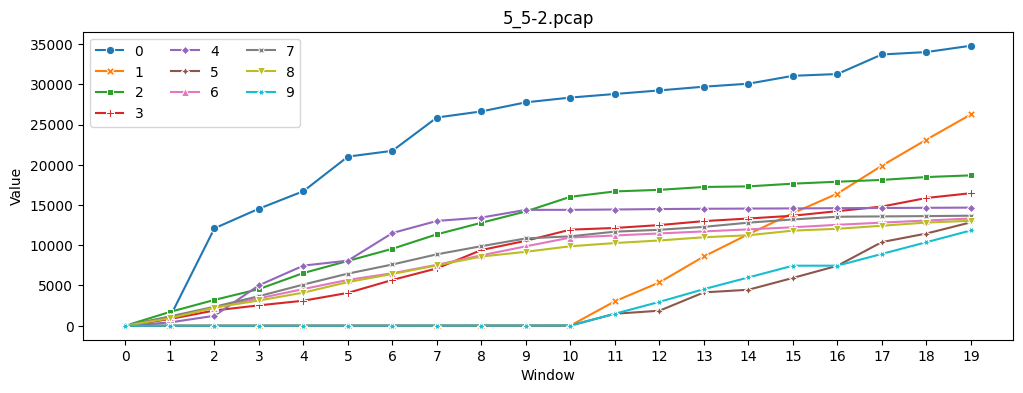

In [14]:
def plot_accumulate(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='5_5.pcap/', type="accumulate.txt"):
    
    res = read_data(algo, row, width, level, seed, count, flowkey, epochs, dataset, type)[algo][:10]

    plt.figure(figsize=(12, 4))
    
    sns.lineplot(data=res, dashes=False, markers=True)
    # for i, data_set in enumerate(res):
        # plt.plot(range(1,21), data_set, label=f'Data Set {i + 1}')
        

    # Add labels and legend
    plt.xlabel('Window')
    plt.ylabel('Value')
    plt.title(dataset[:-1])
    # plt.axhline(10000, c="black")
    plt.xticks([i for i in range(20)])
    plt.legend(loc='upper left', ncol=math.ceil(len(res)/4))

    # Show the plot
    plt.show()
    
plot_accumulate(dataset='10_0.pcap/')
plot_accumulate(dataset='5_5.pcap/')
plot_accumulate(dataset='4_6.pcap/')
plot_accumulate(dataset='3_7.pcap/')

plot_accumulate(dataset='5_5-2.pcap/')

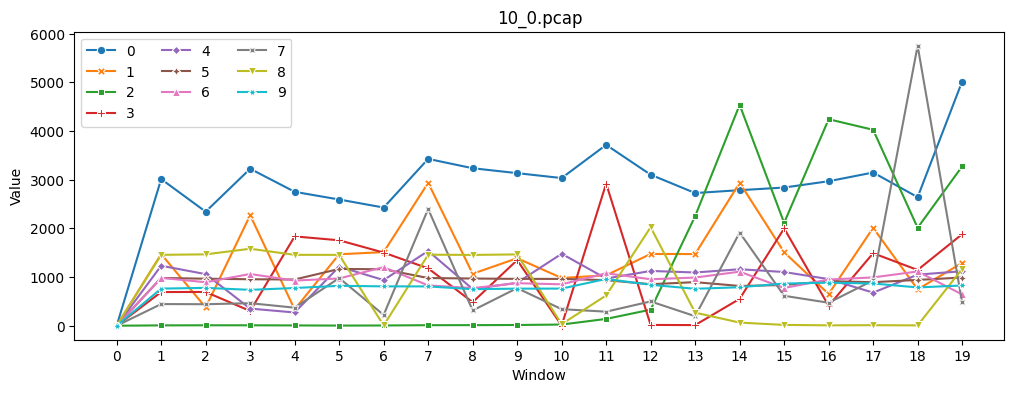

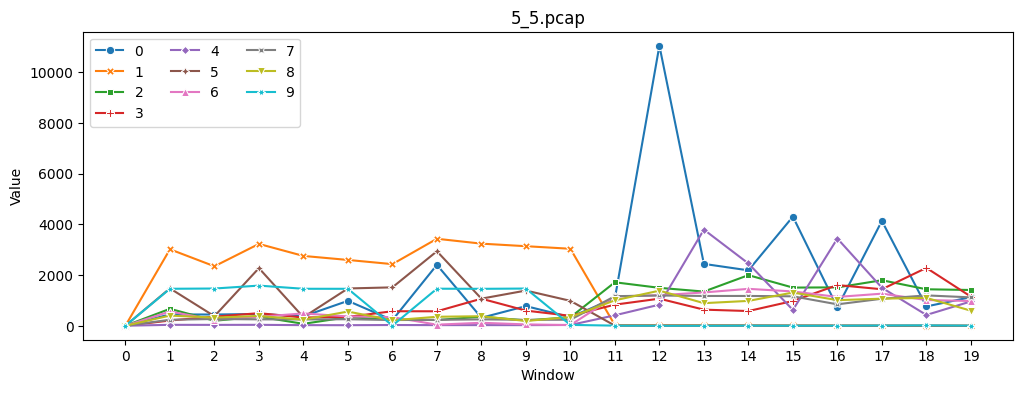

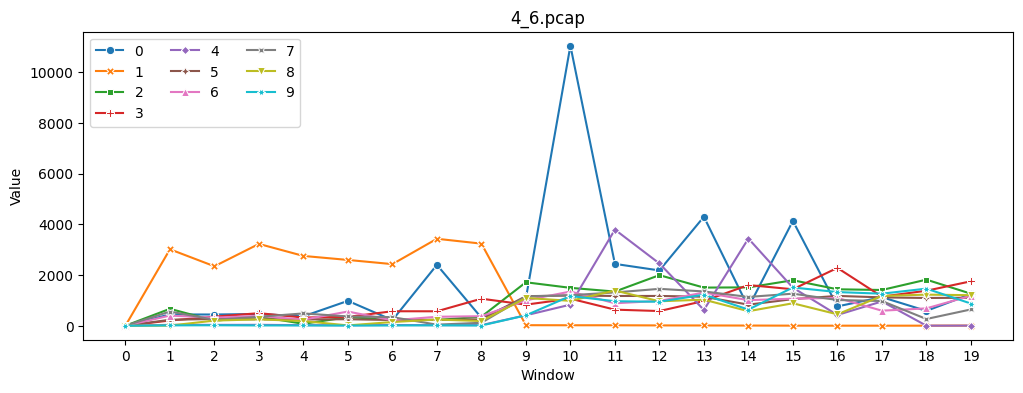

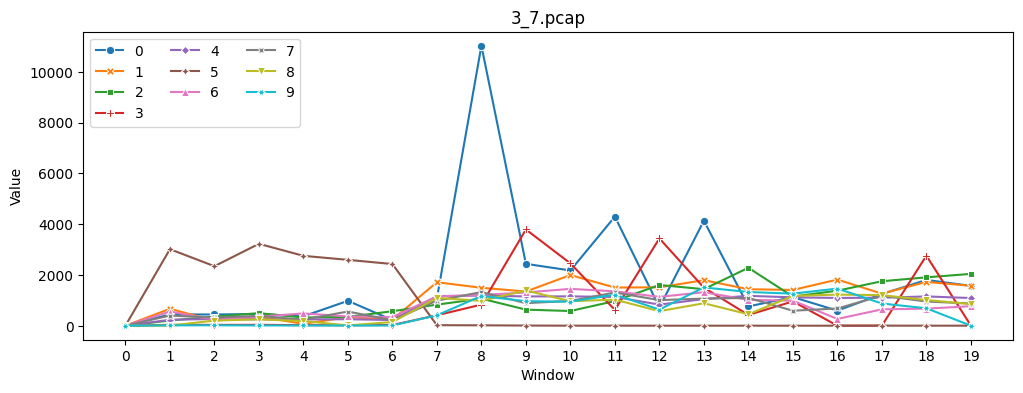

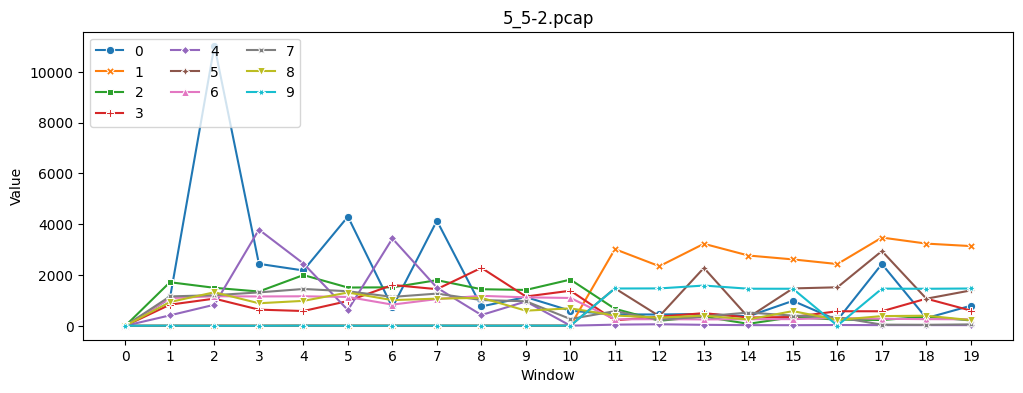

In [15]:
def plot_variation(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='5_5.pcap/', type="variation.txt"):
    
    res = read_data(algo, row, width, level, seed, count, flowkey, epochs, dataset, type)[algo][:10]

    plt.figure(figsize=(12, 4))
    
    sns.lineplot(data=res, dashes=False, markers=True)
    # for i, data_set in enumerate(res):
        # plt.plot(range(1,21), data_set, label=f'Data Set {i + 1}')
        

    # Add labels and legend
    plt.xlabel('Window')
    plt.ylabel('Value')
    plt.title(dataset[:-1])
    plt.xticks([i for i in range(20)])
    plt.legend(loc='upper left', ncol=math.ceil(len(res)/4))

    # Show the plot
    plt.show()
    
plot_variation(dataset='10_0.pcap/')
plot_variation(dataset='5_5.pcap/')
plot_variation(dataset='4_6.pcap/')
plot_variation(dataset='3_7.pcap/')

plot_variation(dataset='5_5-2.pcap/')

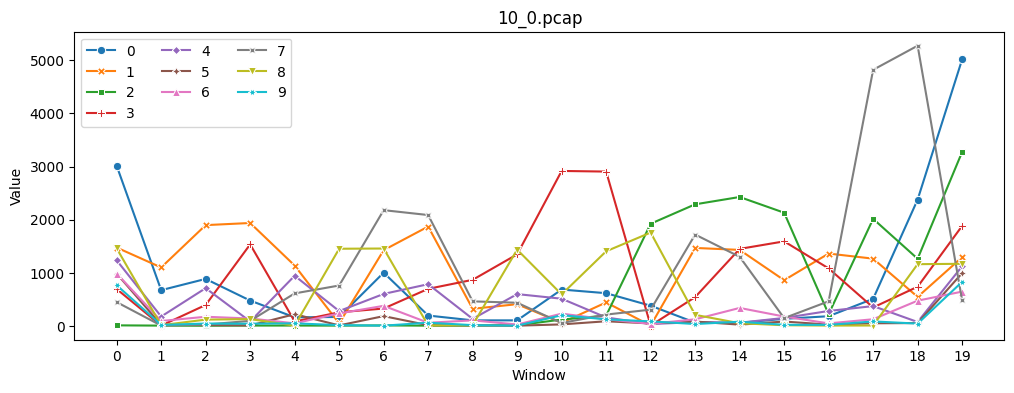

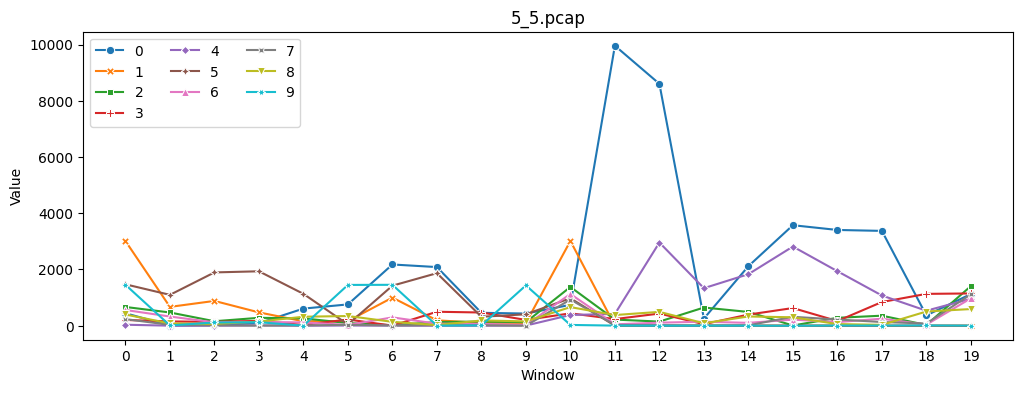

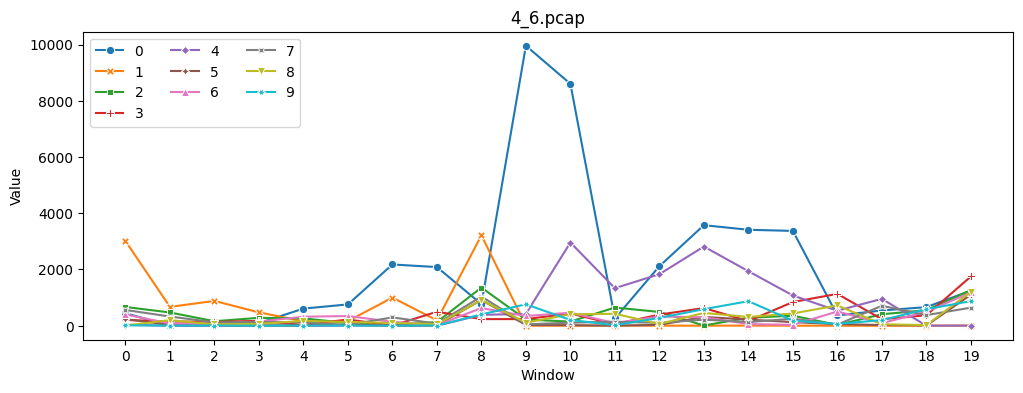

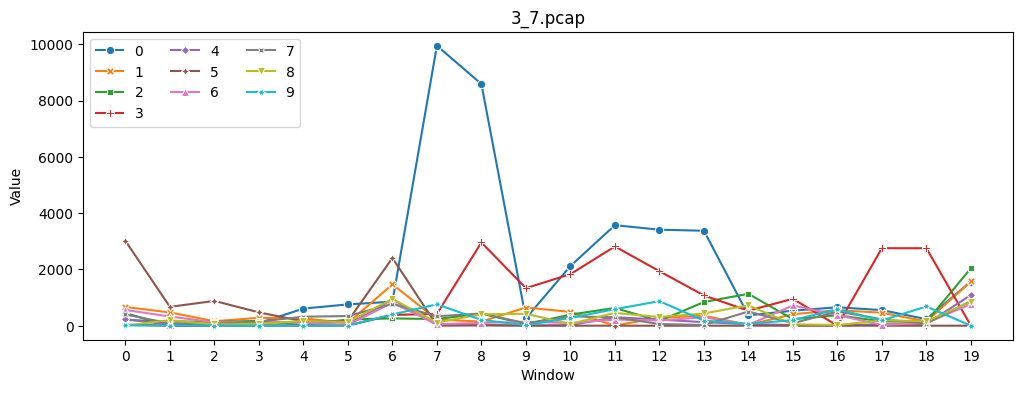

In [7]:
def plot_second_variation(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='5_5.pcap/', type="second_variation.txt"):
    
    res = read_data(algo, row, width, level, seed, count, flowkey, epochs, dataset, type)[algo][:10]

    plt.figure(figsize=(12, 4))
    
    sns.lineplot(data=res, dashes=False, markers=True)
    # for i, data_set in enumerate(res):
        # plt.plot(range(1,21), data_set, label=f'Data Set {i + 1}')
        

    # Add labels and legend
    plt.xlabel('Window')
    plt.ylabel('Value')
    plt.title(dataset[:-1])
    plt.xticks([i for i in range(20)])
    plt.legend(loc='upper left', ncol=math.ceil(len(res)/4))

    # Show the plot
    plt.show()
    
plot_second_variation(dataset='10_0.pcap/')
plot_second_variation(dataset='5_5.pcap/')
plot_second_variation(dataset='4_6.pcap/')
plot_second_variation(dataset='3_7.pcap/')